In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib

In [6]:
df = pd.read_csv('Anxiety.csv')

In [7]:
df.head(20)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Anxiety
0,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1
2,1,0,1,1,1,1,1,1
3,0,0,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1
5,0,1,0,1,1,1,1,1
6,1,0,0,1,1,1,1,1
7,0,0,0,1,1,1,1,0.6
8,1,1,1,0,1,1,1,1
9,0,1,1,0,1,1,1,1


<AxesSubplot:>

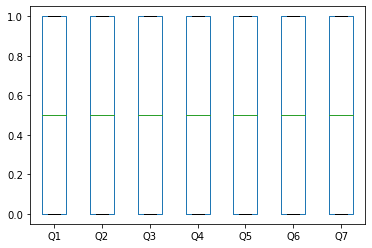

In [8]:
df.plot(kind='box')

In [10]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [11]:
model = DTC()

In [12]:
X = df.drop('Anxiety',axis=1)
y = df['Anxiety']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model.fit(X ,y)

DecisionTreeClassifier()

In [17]:
X_test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7
55,0,0,0,1,0,0,1
40,1,1,1,0,1,0,1
19,0,0,1,1,0,1,1
31,0,0,0,0,0,1,1
98,1,0,1,1,1,0,0
56,1,1,1,0,0,0,1
69,0,1,0,1,1,1,0
104,1,1,1,0,1,0,0
81,0,1,1,1,0,1,0
26,1,0,1,0,0,1,1


In [18]:
predictions = model.predict(X_test)

In [12]:
metrics.confusion_matrix(y_test,predictions)

array([[ 8,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 11]], dtype=int64)

In [13]:
metrics.classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         0.3       1.00      1.00      1.00         8\n         0.6       1.00      1.00      1.00        20\n           1       1.00      1.00      1.00        11\n\n    accuracy                           1.00        39\n   macro avg       1.00      1.00      1.00        39\nweighted avg       1.00      1.00      1.00        39\n'

In [14]:
prediction = model.predict([[0,0,0,0,0,1,1]])

In [15]:
print(prediction[0])

0.3


In [26]:
joblib_file = "anxiety.pkl"  
joblib.dump(model, joblib_file)

['anxiety.pkl']

In [27]:
anxiety = joblib.load(joblib_file)

In [28]:
anxiety.predict([[0,0,0,0,0,1,1]])

array(['0.3'], dtype=object)

In [73]:
def predictions(answers_array):
    anxiety_model = joblib.load("anxiety.pkl")
    prediction = anxiety_model.predict([answers_array])
    switcher = {
        0: 'No Anxiety',
        0.3: 'Minor Anxiety',
        0.6: 'Moderate Anxiety',
        1.0: 'Severe Anxiety'
    } 
            
    return switcher.get(float(prediction[0]),"Wrong Result")

def prediction(q1,q2,q3,q4,q5,q6,q7):
    anxiety_model = joblib.load("anxiety.pkl")
    prediction = anxiety_model.predict([[q1,q2,q3,q4,q5,q6,q7]])
    switcher = {
        0: 'No Anxiety',
        0.3: 'Minor Anxiety',
        0.6: 'Moderate Anxiety',
        1.0: 'Severe Anxiety'
    } 
            
    return switcher.get(float(prediction[0]),"Wrong Result")
    

In [74]:
pred = predictions([0,0,0,0,0,0,0])
pred

'No Anxiety'

In [75]:
pred = prediction(0,0,0,0,0,1,1)
pred

'Minor Anxiety'